/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.7500 - loss: 0.4994
Loss: 0.4994, Accuracy: 0.7500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predictions:
[[0.39426568]
 [0.8162826 ]
 [0.44808534]
 [0.38765714]]
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


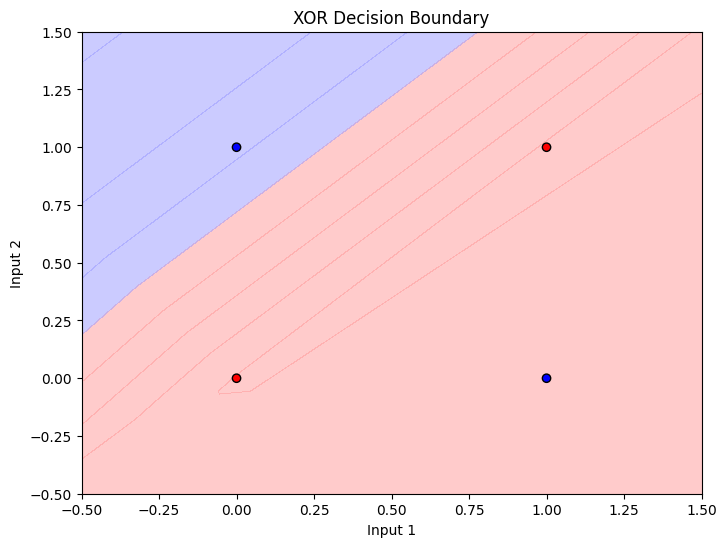

In [1]:
# Import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# XOR input and output data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Create a sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=1000, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f"Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")

# Make predictions
predictions = model.predict(X)
print("Predictions:")
print(predictions)

# Plot the XOR data points and decision boundary
def plot_decision_boundary(model, X, y):
    cmap_background = ListedColormap(['#FF9999', '#9999FF'])
    cmap_points = ListedColormap(['#FF0000', '#0000FF'])
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y[:, 0], cmap=cmap_points, edgecolors='k')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title('XOR Decision Boundary')
    plt.show()

# Plot the decision boundary
plot_decision_boundary(model, X, y)
